In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [ ]:
# Load the dataset
data = pd.read_csv('troop_movements.csv')

counts_of_data = data.groupby(['empire_or_resistance']).size().reset_index(name='count')
print(counts_of_data)

  empire_or_resistance  count
0               empire    480
1           resistance    520


In [ ]:
count_of_homeworld = data.groupby('homeworld').size().reset_index(name='count')
print(count_of_homeworld)

       homeworld  count
0       Alderaan     29
1    Aleen Minor     26
2     Bestine IV     22
3          Cerea     21
4       Champala     32
5      Chandrila     21
6   Concord Dawn     20
7       Corellia     27
8        Dagobah     20
9       Dathomir     28
10         Dorin     25
11        Eriadu     28
12   Glee Anselm     27
13    Haruun Kal     12
14       Iktotch     22
15      Iridonia     22
16         Kalee     20
17      Kashyyyk     23
18     Malastare     23
19        Mirial     27
20      Mon Cala     26
21    Muunilinst     17
22         Naboo     22
23          Ojom     24
24       Quermia     23
25         Rodia     25
26        Ryloth     33
27       Serenno     27
28         Shili     16
29         Skako     21
30       Socorro     27
31       Stewjon     16
32       Sullust     28
33      Tatooine     36
34       Tholoth     24
35      Toydaria     26
36     Trandosha     19
37       Troiken     25
38          Tund     17
39        Umbara     23
40       Vulpter

In [ ]:
# Groups of unit types

unit_types = data.groupby('unit_type').size().reset_index(name='count')
unit_types

,unit_type,count
0,at-at,109
1,at-st,133
2,resistance_soldier,130
3,stormtrooper,108
4,tie_fighter,127
5,tie_silencer,137
6,unknown,133
7,x-wing,123


In [ ]:
# Creates a new feature based on whether character is empire or resistance
data["is_resistance"] = data["empire_or_resistance"] == "resistance"
print(data.head())

             timestamp  unit_id    unit_type empire_or_resistance  location_x  \
0  2025-07-08 14:42:20        1        at-st           resistance           2   
1  2025-07-08 14:42:19        2  tie_fighter               empire           8   
2  2025-07-08 14:42:18        3       x-wing           resistance          10   
3  2025-07-08 14:42:17        4       x-wing               empire           6   
4  2025-07-08 14:42:16        5       x-wing               empire           1   

   location_y  destination_x  destination_y     homeworld  is_resistance  
0           5              3              8        Ryloth           True  
1           3              5              6  Concord Dawn          False  
2           7              6              3         Skako           True  
3          10              9              6    Muunilinst          False  
4           3              7              1    Bestine IV          False  


C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_5432\3406889897.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='empire_or_resistance', palette=['#1f77b4', '#ff7f0e'])


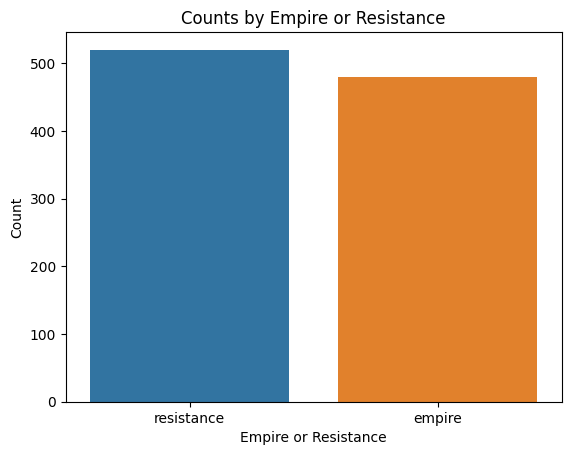

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for 'empire_or_resistance'
sns.countplot(data=data, x='empire_or_resistance', palette=['#1f77b4', '#ff7f0e'])

plt.title('Counts by Empire or Resistance')
plt.xlabel('Empire or Resistance')
plt.ylabel('Count')
plt.show()

In [ ]:
# Descion Tree that predicts if a character is joining eithe rthe empire or the resistance 
# based on their homeworld and unit type

from sklearn.tree import DecisionTreeClassifier

features = ['unit_type', 'homeworld']
x, y = data[features], data['empire_or_resistance']

# Encode categorical features
x_encoded = pd.get_dummies(x, columns = ['unit_type', 'homeworld'])

x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=.3, random_state=42)

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)
y_pred

array(['empire', 'resistance', 'resistance', 'empire', 'empire', 'empire',
       'empire', 'resistance', 'resistance', 'empire', 'resistance',
       'empire', 'empire', 'empire', 'resistance', 'resistance',
       'resistance', 'resistance', 'resistance', 'resistance', 'empire',
       'empire', 'empire', 'empire', 'empire', 'empire', 'resistance',
       'empire', 'resistance', 'resistance', 'empire', 'empire', 'empire',
       'resistance', 'empire', 'resistance', 'resistance', 'resistance',
       'resistance', 'resistance', 'empire', 'empire', 'empire',
       'resistance', 'empire', 'empire', 'resistance', 'empire',
       'resistance', 'resistance', 'resistance', 'resistance', 'empire',
       'empire', 'empire', 'empire', 'resistance', 'empire', 'resistance',
       'empire', 'empire', 'resistance', 'resistance', 'resistance',
       'resistance', 'resistance', 'empire', 'resistance', 'empire',
       'resistance', 'resistance', 'resistance', 'resistance',
       'resistance',

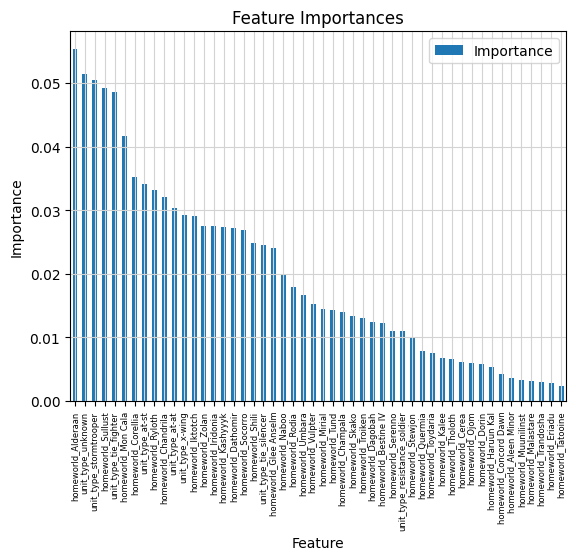

In [ ]:
importances = dtc.feature_importances_
feature_importances = pd.DataFrame({'Feature': x_encoded.columns, 'Importance': importances})
feature_importances.sort_values('Importance', ascending = False).plot.bar(x = 'Feature', y = 'Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.grid(color = '#d3d3d3')
plt.xticks(fontsize = 6)
plt.show()

In [ ]:
import pickle

# Specify the file path to save the pipeline
file_path = 'trained_model.pkl'

# Save the pipeline to disk
with open(file_path, 'wb') as file:
    pickle.dump('trained_model', file)

In [ ]:
# Load "real data" and clean unit_type feature
df = pd.read_csv('troop_movements_1m.csv')

df.replace('invalid_unit', 'unknown')
df.head(25)

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
0,2023-06-03 03:19:15,919214,tie_silencer,2.0,5.0,9,3,Aleen Minor
1,2023-02-24 13:50:40,9467154,stormtrooper,9.0,0.0,9,1,Malastare
2,2023-03-29 19:54:55,6585778,tie_silencer,0.0,6.0,5,9,Serenno
3,2023-04-30 00:58:11,3878023,tie_silencer,4.0,2.0,9,9,Tund
4,2023-04-10 22:00:26,5537117,at-st,6.0,8.0,5,8,Skako
5,2023-04-06 19:26:03,5893460,x-wing,2.0,7.0,6,5,Troiken
6,2023-03-05 22:52:50,8653686,tie_silencer,6.0,9.0,1,9,Sullust
7,2023-03-26 10:26:45,6880282,tie_silencer,9.0,1.0,7,2,Troiken
8,2023-02-24 10:42:24,9478496,resistance_soldier,1.0,3.0,3,8,Stewjon
9,2023-05-10 22:57:10,2930983,tie_silencer,8.0,0.0,1,9,Quermia


In [ ]:
 # Fill in missing values of location_x and y features
df.ffill()
df.head()

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
0,2023-06-03 03:19:15,919214,tie_silencer,2.0,5.0,9,3,Aleen Minor
1,2023-02-24 13:50:40,9467154,stormtrooper,9.0,0.0,9,1,Malastare
2,2023-03-29 19:54:55,6585778,tie_silencer,0.0,6.0,5,9,Serenno
3,2023-04-30 00:58:11,3878023,tie_silencer,4.0,2.0,9,9,Tund
4,2023-04-10 22:00:26,5537117,at-st,6.0,8.0,5,8,Skako


In [ ]:
# Save the DataFrame to a Parquet file
df.to_parquet('troop_movements_1m.parquet', engine='pyarrow')